In [68]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#ENTER THE UAH DRIVESET LOCATION
path = 'C:/DDS/Semester2/AnalyticsProject/UAH-DRIVESET-v1/UAH-DRIVESET-v1/'

In [12]:
driver = 'D1','D2','D3','D4','D5','D6'
condition = 'NORMAL1_SECONDARY','NORMAL2_SECONDARY','NORMAL_MOTORWAY','AGGRESSIVE_MOTORWAY','DROWSY_MOTORWAY','AGGRESSIVE_SECONDARY','DROWSY_SECONDARY'
parameter = 'RAW_GPS','RAW_ACCELEROMETERS','PROC_LANE_DETECTION','PROL_VEHICLE_DETECTION','PROC_OPENSTREETMAP_DATA','EVENTS_INERTIAL'

In [15]:
#FOLDER PATH
D1_NORMAL1_SECONDARY = 'D1/20151110175712-16km-D1-NORMAL1-SECONDARY'
#D1_NORMAL2_SECONDARY = 'D1/20151110180824-16km-D1-NORMAL2-SECONDARY'
D1_NORMAL_MOTORWAY = 'D1/20151111123124-25km-D1-NORMAL-MOTORWAY'
#D1_AGGRESSIVE_MOTORWAY = 'D1/20151111125233-24km-D1-AGGRESSIVE-MOTORWAY'
D1_DROWSY_MOTORWAY = 'D1/20151111132348-25km-D1-DROWSY-MOTORWAY'        #5s delay
D1_AGGRESSIVE_SECONDARY = 'D1/20151111134545-16km-D1-AGGRESSIVE-SECONDARY'
#D1_DROWSY_SECONDARY = 'D1/20151111135612-13km-D1-DROWSY-SECONDARY'
D2_NORMAL1_SECONDARY = 'D2/20151120160904-16km-D2-NORMAL1-SECONDARY'
D2_NORMAL2_SECONDARY = 'D2/20151120162105-17km-D2-NORMAL2-SECONDARY'
D2_NORMAL_MOTORWAY = 'D2/20151120131714-26km-D2-NORMAL-MOTORWAY'       #10s delay
#D2_AGGRESSIVE_MOTORWAY = 'D2/20151120133502-26km-D2-AGGRESSIVE-MOTORWAY'
D2_DROWSY_MOTORWAY = 'D2/20151120135152-25km-D2-DROWSY-MOTORWAY'
D2_AGGRESSIVE_SECONDARY = 'D2/20151120163350-16km-D2-AGGRESSIVE-SECONDARY'
D2_DROWSY_SECONDARY = 'D2/20151120164606-16km-D2-DROWSY-SECONDARY'
#D3_NORMAL1_SECONDARY = 'D3/20151126124208-16km-D3-NORMAL1-SECONDARY'
#D3_NORMAL2_SECONDARY = 'D3/20151126125458-16km-D3-NORMAL2-SECONDARY'
D3_NORMAL_MOTORWAY = 'D3/20151126110502-26km-D3-NORMAL-MOTORWAY'
D3_AGGRESSIVE_MOTORWAY = 'D3/20151126134736-26km-D3-AGGRESSIVE-MOTORWAY'
D3_DROWSY_MOTORWAY = 'D3/20151126113754-26km-D3-DROWSY-MOTORWAY'
D3_AGGRESSIVE_SECONDARY = 'D3/20151126130707-16km-D3-AGGRESSIVE-SECONDARY'
#D3_DROWSY_SECONDARY = 'D3/20151126132013-17km-D3-DROWSY-SECONDARY'
D4_NORMAL1_SECONDARY = 'D4/20151203171800-16km-D4-NORMAL1-SECONDARY'
D4_NORMAL2_SECONDARY = 'D4/20151203173103-17km-D4-NORMAL2-SECONDARY'
D4_NORMAL_MOTORWAY = 'D4/20151204152848-25km-D4-NORMAL-MOTORWAY'         #7s delay
D4_AGGRESSIVE_MOTORWAY = 'D4/20151204154908-25km-D4-AGGRESSIVE-MOTORWAY'
D4_DROWSY_MOTORWAY = 'D4/20151204160823-25km-D4-DROWSY-MOTORWAY'
D4_AGGRESSIVE_SECONDARY = 'D4/20151203174324-16km-D4-AGGRESSIVE-SECONDARY'
#D4_DROWSY_SECONDARY = 'D4/20151203175637-17km-D4-DROWSY-SECONDARY'
#D5_NORMAL1_SECONDARY = 'D5/20151211162829-16km-D5-NORMAL1-SECONDARY'
#D5_NORMAL2_SECONDARY = 'D5/20151211164124-17km-D5-NORMAL2-SECONDARY'
D5_NORMAL_MOTORWAY = 'D5/20151209151242-25km-D5-NORMAL-MOTORWAY'         #5s delay
D5_AGGRESSIVE_MOTORWAY = 'D5/20151209153137-25km-D5-AGGRESSIVE-MOTORWAY'
#D5_DROWSY_MOTORWAY = 'D5/20151211160213-25km-D5-DROWSY-MOTORWAY'
#D5_AGGRESSIVE_SECONDARY = 'D5/20151211165606-12km-D5-AGGRESSIVE-SECONDARY'
#D5_DROWSY_SECONDARY = 'D5/20151211170502-16km-D5-DROWSY-SECONDARY'
#D6_NORMAL_SECONDARY = 'D6/20151221112434-17km-D6-NORMAL-SECONDARY'
D6_NORMAL_MOTORWAY = 'D6/20151217162714-26km-D6-NORMAL-MOTORWAY'         #9s delay
D6_AGGRESSIVE_MOTORWAY = 'D6/20151221120051-26km-D6-AGGRESSIVE-MOTORWAY' #4s delay
#D6_DROWSY_MOTORWAY = 'D6/20151217164730-25km-D6-DROWSY-MOTORWAY'
#D6_DROWSY_SECONDARY = 'D6/20151221113846-16km-D6-DROWSY-SECONDARY'

## Data Import

<b>Please add your path in the below cell to load the data</b>

In [13]:
def raw_gps(path, driver_condition):
    driver_condition = path + driver_condition
    raw_gps = pd.read_csv(driver_condition+"/RAW_GPS.txt"\
                     ,sep = ' ',\
                     names=['Timestamp','Speed','Lat','Long','Altitude','VA','HA','Course','DC1','DC2','DC3','DC4'],\
                     index_col=False)
    
    df_gps =  raw_gps[['Timestamp','Speed']].copy()
    df_gps['Timestamp']=df_gps['Timestamp']//1

    x1=df_gps['Timestamp'].astype('int')
    x1.drop_duplicates(inplace=True)

    x2=df_gps.groupby('Timestamp')['Speed'].mean()

    x1 = list(x1)
    x2 = list(x2)

    d = {'Timestamp': x1, 'Speed': x2}
    df_gps2=pd.DataFrame(data=d)
    return df_gps2


In [16]:
D1_NORMAL_MOTORWAY_GPS = raw_gps(path, D1_NORMAL_MOTORWAY)
D1_NORMAL_MOTORWAY_GPS.head()

,Timestamp,Speed
0,11,0.0
1,12,78.8
2,13,82.7
3,14,85.5
4,15,85.7


In [ ]:
D1_NORMAL_MOTORWAY_GPS.describe()

In [17]:
def raw_acc(path, driver_condition):
    driver_condition = path + driver_condition
    raw_acc = pd.read_csv(driver_condition+ "/RAW_ACCELEROMETERS.txt",\
                     names=['Timestamp','Bool','A_x','A_y','A_z','KF_x','KF_y','KF_z','Roll','Pitch','Yaw'],sep=' ',\
                      index_col=False)
    
    df_raw_acc = raw_acc[['Timestamp','A_x','A_y','A_z']].copy()
    df_raw_acc['Timestamp']=df_raw_acc['Timestamp']//1

    x1=df_raw_acc['Timestamp'].astype(int)
    x1.drop_duplicates(inplace=True)

    x2=df_raw_acc.groupby('Timestamp')['A_x'].mean()
    x3=df_raw_acc.groupby('Timestamp')['A_y'].mean()
    x4=df_raw_acc.groupby('Timestamp')['A_z'].mean()

    x1 = list(x1)
    x2 = list(x2)
    x3 = list(x3)
    x4 = list(x4)

    d = {'Timestamp': x1, 'A_x': x2, 'A_y':x3,'A_z':x4}
    df_raw_accel = pd.DataFrame(data=d)
    
    return df_raw_accel

In [18]:
D1_NORMAL_MOTORWAY_RAW_ACC = raw_acc(path, D1_NORMAL_MOTORWAY)
D1_NORMAL_MOTORWAY_RAW_ACC.head()

,Timestamp,A_x,A_y,A_z
0,0,0.045778,0.120778,0.017444
1,1,-0.034100,0.079600,-0.084500
2,2,-0.032800,-0.119600,-0.067000
3,3,-0.014500,-0.232900,-0.043400
4,4,-0.038600,-0.248000,-0.072400


In [ ]:
D1_NORMAL_MOTORWAY_RAW_ACC.describe()

In [19]:
def proc_lane_det(path, driver_condition):
    driver_condition = path + driver_condition
    proc_lane_det = pd.read_csv(driver_condition+ "/PROC_LANE_DETECTION.txt",\
                     names=['Timestamp','X_pos','Phi_angle','Road_width','Lane_state'],sep=' ',index_col=False)
    
    df_lane_det = proc_lane_det[['Timestamp','X_pos','Phi_angle','Road_width']].copy()
    df_lane_det['Timestamp']=df_lane_det['Timestamp']//1

    x1=df_lane_det['Timestamp'].astype('int')
    x1.drop_duplicates(inplace=True)
    x2=df_lane_det.groupby('Timestamp')['X_pos'].max()
    x3=df_lane_det.groupby('Timestamp')['Phi_angle'].max()
    x4=df_lane_det.groupby('Timestamp')['Road_width'].max()
    x1 = list(x1)
    x2 = list(x2)
    x3 = list(x3)
    x4 = list(x4)

    d = {'Timestamp': x1, 'X_pos': x2, 'Phi_angle':x3,'Road_width':x4}
    df_lane_det = pd.DataFrame(data=d)
    
    return df_lane_det

In [20]:
D1_NORMAL_MOTORWAY_LANE_DET = proc_lane_det(path, D1_NORMAL_MOTORWAY)
D1_NORMAL_MOTORWAY_LANE_DET.head()

,Timestamp,X_pos,Phi_angle,Road_width
0,10,-9.0,-9.000,-9.0
1,11,-9.0,-9.000,-9.0
2,12,0.0,-0.000,3.5
3,13,0.0,-0.000,3.5
4,14,0.3,0.047,3.5


In [ ]:
D1_NORMAL_MOTORWAY_LANE_DET.describe()

In [21]:
def proc_veh_det(path, driver_condition):
    
    driver_condition = path+driver_condition
    
    proc_veh_det = pd.read_csv(driver_condition+"/PROC_VEHICLE_DETECTION.txt",\
                     names=['Timestamp','Dist_Veh','TOI','No_Of_Veh','GPS'],sep=' ',index_col=False)
    
    df_veh_det = proc_veh_det[['Timestamp','Dist_Veh','No_Of_Veh','GPS']].copy()
    df_veh_det['Dist_Veh'] = df_veh_det['Dist_Veh'].replace(-1.0,999)
    df_veh_det['Timestamp']=df_veh_det['Timestamp']//1

    x1=df_veh_det['Timestamp'].astype('int')
    x1.drop_duplicates(inplace=True)

    x2=df_veh_det.groupby('Timestamp')['No_Of_Veh'].max()
    x3=df_veh_det.groupby('Timestamp')['Dist_Veh'].min()
    x4=df_veh_det.groupby('Timestamp')['GPS'].mean()

    x1 = list(x1)
    x2 = list(x2)
    x3 = list(x3)
    x4 = list(x4)

    d = {'Timestamp': x1, 'No_Of_Veh': x2, 'Dist_Veh':x3,'GPS':x4}
    df_veh_det = pd.DataFrame(data=d)
    
    return df_veh_det

In [22]:
D1_NORMAL_MOTORWAY_VEH_DET = proc_veh_det(path, D1_NORMAL_MOTORWAY)
D1_NORMAL_MOTORWAY_VEH_DET.head()

,Timestamp,No_Of_Veh,Dist_Veh,GPS
0,12,0,999.0,77.800000
1,13,0,999.0,79.287500
2,14,0,999.0,83.050000
3,15,0,999.0,85.540000
4,16,0,999.0,85.655556


In [23]:
def evn_lane_chg(path, driver_condition):
    
    driver_condition = path+driver_condition
    
    evn_lane_chg = pd.read_csv(driver_condition+"/EVENTS_LIST_LANE_CHANGES.txt",\
                     names=['Timestamp','Type','Lat','Lon','Duration','Threshold'],sep=' ',index_col=False)
    
    df_lane_chg = evn_lane_chg[['Timestamp','Type']].copy()
    df_lane_chg['Timestamp'] = (df_lane_chg['Timestamp']//1).astype(int)
    df_lane_chg.rename(columns={"Type": "Lane_Change"},inplace=True)
    df_lane_chg.drop_duplicates(inplace=True)
    
    return df_lane_chg
    

In [24]:
D1_NORMAL_MOTORWAY_LANE_CHG = evn_lane_chg(path, D1_NORMAL_MOTORWAY)
D1_NORMAL_MOTORWAY_LANE_CHG.head()

,Timestamp,Lane_Change
0,18,-1
1,33,-1
2,54,-1
3,64,1
4,81,1


In [ ]:
D1_NORMAL_MOTORWAY_LANE_CHG.describe()

In [25]:
D1_DROWSY_MOTORWAY_GPS = raw_gps(path, D1_DROWSY_MOTORWAY)
D1_DROWSY_MOTORWAY_RAW_ACC= raw_acc(path, D1_DROWSY_MOTORWAY)
D1_DROWSY_MOTORWAY_VEH_DET= proc_veh_det(path, D1_DROWSY_MOTORWAY)
D1_DROWSY_MOTORWAY_LANE_DET = proc_lane_det(path, D1_DROWSY_MOTORWAY)
D1_DROWSY_MOTORWAY_LANE_CHG = evn_lane_chg(path, D1_DROWSY_MOTORWAY)

In [26]:
D1_DROWSY_MOTORWAY_LANE_CHG['Timestamp']= D1_DROWSY_MOTORWAY_LANE_CHG['Timestamp']+5  #5s delay in the timestamp
D1_DROWSY_MOTORWAY_LANE_CHG.head()

,Timestamp,Lane_Change
0,23,-1
1,44,-2
2,84,1
3,142,-1
4,156,1


In [27]:
D2_NORMAL_MOTORWAY_GPS = raw_gps(path, D2_NORMAL_MOTORWAY)
D2_NORMAL_MOTORWAY_RAW_ACC= raw_acc(path, D2_NORMAL_MOTORWAY)
D2_NORMAL_MOTORWAY_VEH_DET= proc_veh_det(path, D2_NORMAL_MOTORWAY)
D2_NORMAL_MOTORWAY_LANE_DET = proc_lane_det(path, D2_NORMAL_MOTORWAY)
D2_NORMAL_MOTORWAY_LANE_CHG = evn_lane_chg(path, D2_NORMAL_MOTORWAY)

In [28]:
D2_NORMAL_MOTORWAY_LANE_CHG['Timestamp'] = D2_NORMAL_MOTORWAY_LANE_CHG['Timestamp']+10 #10s delay in the timestamp

In [29]:
D3_NORMAL_MOTORWAY_GPS = raw_gps(path, D3_NORMAL_MOTORWAY)
D3_NORMAL_MOTORWAY_RAW_ACC= raw_acc(path, D3_NORMAL_MOTORWAY)
D3_NORMAL_MOTORWAY_VEH_DET= proc_veh_det(path, D3_NORMAL_MOTORWAY)
D3_NORMAL_MOTORWAY_LANE_DET = proc_lane_det(path, D3_NORMAL_MOTORWAY)
D3_NORMAL_MOTORWAY_LANE_CHG = evn_lane_chg(path, D3_NORMAL_MOTORWAY)

In [30]:
D3_AGGRESSIVE_MOTORWAY_GPS = raw_gps(path, D3_AGGRESSIVE_MOTORWAY)
D3_AGGRESSIVE_MOTORWAY_RAW_ACC= raw_acc(path, D3_AGGRESSIVE_MOTORWAY)
D3_AGGRESSIVE_MOTORWAY_VEH_DET= proc_veh_det(path, D3_AGGRESSIVE_MOTORWAY)
D3_AGGRESSIVE_MOTORWAY_LANE_DET = proc_lane_det(path, D3_AGGRESSIVE_MOTORWAY)
D3_AGGRESSIVE_MOTORWAY_LANE_CHG = evn_lane_chg(path, D3_AGGRESSIVE_MOTORWAY)

In [31]:
D3_DROWSY_MOTORWAY_GPS = raw_gps(path, D3_DROWSY_MOTORWAY)
D3_DROWSY_MOTORWAY_RAW_ACC= raw_acc(path, D3_DROWSY_MOTORWAY)
D3_DROWSY_MOTORWAY_VEH_DET= proc_veh_det(path, D3_DROWSY_MOTORWAY)
D3_DROWSY_MOTORWAY_LANE_DET = proc_lane_det(path, D3_DROWSY_MOTORWAY)
D3_DROWSY_MOTORWAY_LANE_CHG = evn_lane_chg(path, D3_DROWSY_MOTORWAY)

In [32]:
D4_NORMAL_MOTORWAY_GPS = raw_gps(path, D4_NORMAL_MOTORWAY)
D4_NORMAL_MOTORWAY_RAW_ACC= raw_acc(path, D4_NORMAL_MOTORWAY)
D4_NORMAL_MOTORWAY_VEH_DET= proc_veh_det(path, D4_NORMAL_MOTORWAY)
D4_NORMAL_MOTORWAY_LANE_DET = proc_lane_det(path, D4_NORMAL_MOTORWAY)
D4_NORMAL_MOTORWAY_LANE_CHG = evn_lane_chg(path, D4_NORMAL_MOTORWAY)

In [33]:
D4_NORMAL_MOTORWAY_LANE_CHG['Timestamp'] = D4_NORMAL_MOTORWAY_LANE_CHG['Timestamp']+7 #7s delay in the timestamp

In [34]:
D4_AGGRESSIVE_MOTORWAY_GPS = raw_gps(path, D4_AGGRESSIVE_MOTORWAY)
D4_AGGRESSIVE_MOTORWAY_RAW_ACC= raw_acc(path, D4_AGGRESSIVE_MOTORWAY)
D4_AGGRESSIVE_MOTORWAY_VEH_DET= proc_veh_det(path, D4_AGGRESSIVE_MOTORWAY)
D4_AGGRESSIVE_MOTORWAY_LANE_DET = proc_lane_det(path, D4_AGGRESSIVE_MOTORWAY)
D4_AGGRESSIVE_MOTORWAY_LANE_CHG = evn_lane_chg(path, D4_AGGRESSIVE_MOTORWAY)

In [35]:
D4_DROWSY_MOTORWAY_GPS = raw_gps(path, D4_DROWSY_MOTORWAY)
D4_DROWSY_MOTORWAY_RAW_ACC= raw_acc(path, D4_DROWSY_MOTORWAY)
D4_DROWSY_MOTORWAY_VEH_DET= proc_veh_det(path, D4_DROWSY_MOTORWAY)
D4_DROWSY_MOTORWAY_LANE_DET = proc_lane_det(path, D4_DROWSY_MOTORWAY)
D4_DROWSY_MOTORWAY_LANE_CHG = evn_lane_chg(path, D4_DROWSY_MOTORWAY)

In [36]:
D5_NORMAL_MOTORWAY_GPS = raw_gps(path, D5_NORMAL_MOTORWAY)
D5_NORMAL_MOTORWAY_RAW_ACC= raw_acc(path, D5_NORMAL_MOTORWAY)
D5_NORMAL_MOTORWAY_VEH_DET= proc_veh_det(path, D5_NORMAL_MOTORWAY)
D5_NORMAL_MOTORWAY_LANE_DET = proc_lane_det(path, D5_NORMAL_MOTORWAY)
D5_NORMAL_MOTORWAY_LANE_CHG = evn_lane_chg(path, D5_NORMAL_MOTORWAY)

In [37]:
D5_NORMAL_MOTORWAY_LANE_CHG['Timestamp'] = D5_NORMAL_MOTORWAY_LANE_CHG['Timestamp']+5 #5s delay in the timestamp

In [38]:
D5_AGGRESSIVE_MOTORWAY_GPS = raw_gps(path,D5_AGGRESSIVE_MOTORWAY)
D5_AGGRESSIVE_MOTORWAY_RAW_ACC= raw_acc(path, D5_AGGRESSIVE_MOTORWAY)
D5_AGGRESSIVE_MOTORWAY_VEH_DET= proc_veh_det(path, D5_AGGRESSIVE_MOTORWAY)
D5_AGGRESSIVE_MOTORWAY_LANE_DET = proc_lane_det(path, D5_AGGRESSIVE_MOTORWAY)
D5_AGGRESSIVE_MOTORWAY_LANE_CHG = evn_lane_chg(path, D5_AGGRESSIVE_MOTORWAY)

In [39]:
D6_NORMAL_MOTORWAY_GPS = raw_gps(path,D6_NORMAL_MOTORWAY)
D6_NORMAL_MOTORWAY_RAW_ACC= raw_acc(path, D6_NORMAL_MOTORWAY)
D6_NORMAL_MOTORWAY_VEH_DET= proc_veh_det(path, D6_NORMAL_MOTORWAY)
D6_NORMAL_MOTORWAY_LANE_DET = proc_lane_det(path, D6_NORMAL_MOTORWAY)
D6_NORMAL_MOTORWAY_LANE_CHG = evn_lane_chg(path, D6_NORMAL_MOTORWAY)

In [40]:
D6_NORMAL_MOTORWAY_LANE_CHG['Timestamp'] = D6_NORMAL_MOTORWAY_LANE_CHG['Timestamp']+9 #9s delay in the timestamp

In [41]:
D6_AGGRESSIVE_MOTORWAY_GPS = raw_gps(path,D6_AGGRESSIVE_MOTORWAY)
D6_AGGRESSIVE_MOTORWAY_RAW_ACC= raw_acc(path, D6_AGGRESSIVE_MOTORWAY)
D6_AGGRESSIVE_MOTORWAY_VEH_DET= proc_veh_det(path, D6_AGGRESSIVE_MOTORWAY)
D6_AGGRESSIVE_MOTORWAY_LANE_DET = proc_lane_det(path, D6_AGGRESSIVE_MOTORWAY)
D6_AGGRESSIVE_MOTORWAY_LANE_CHG = evn_lane_chg(path, D6_AGGRESSIVE_MOTORWAY)

In [42]:
D6_AGGRESSIVE_MOTORWAY_LANE_CHG['Timestamp'] = D6_AGGRESSIVE_MOTORWAY_LANE_CHG['Timestamp']+4 #4s delay in the timestamp

### Merging

In [43]:
def mergefiles(df_gps,df,df_veh_det,df_lane_det,df_lane_chg):
    df_merged=df.merge(df_gps,how='left',on='Timestamp')

    df_merged=df_merged.merge(df_lane_chg,how='left',on='Timestamp')

    df_merged=df_merged.merge(df_veh_det,how='left',on='Timestamp')

    df_merged=df_merged.merge(df_lane_det,how='left',on='Timestamp')
    
    return df_merged


In [44]:
frame_1=[D1_NORMAL_MOTORWAY_GPS, D1_NORMAL_MOTORWAY_RAW_ACC, D1_NORMAL_MOTORWAY_VEH_DET, D1_NORMAL_MOTORWAY_LANE_DET, D1_NORMAL_MOTORWAY_LANE_CHG]
frame_2= [D1_DROWSY_MOTORWAY_GPS, D1_DROWSY_MOTORWAY_RAW_ACC, D1_DROWSY_MOTORWAY_VEH_DET, D1_DROWSY_MOTORWAY_LANE_DET, D1_DROWSY_MOTORWAY_LANE_CHG] # list of dataframes
frame_3=[D2_NORMAL_MOTORWAY_GPS, D2_NORMAL_MOTORWAY_RAW_ACC, D2_NORMAL_MOTORWAY_VEH_DET, D2_NORMAL_MOTORWAY_LANE_DET, D2_NORMAL_MOTORWAY_LANE_CHG]
frame_4=[D3_NORMAL_MOTORWAY_GPS, D3_NORMAL_MOTORWAY_RAW_ACC, D3_NORMAL_MOTORWAY_VEH_DET, D3_NORMAL_MOTORWAY_LANE_DET, D3_NORMAL_MOTORWAY_LANE_CHG]
frame_5=[D3_AGGRESSIVE_MOTORWAY_GPS, D3_AGGRESSIVE_MOTORWAY_RAW_ACC, D3_AGGRESSIVE_MOTORWAY_VEH_DET, D3_AGGRESSIVE_MOTORWAY_LANE_DET, D3_AGGRESSIVE_MOTORWAY_LANE_CHG]
frame_6=[D3_DROWSY_MOTORWAY_GPS, D3_DROWSY_MOTORWAY_RAW_ACC, D3_DROWSY_MOTORWAY_VEH_DET, D3_DROWSY_MOTORWAY_LANE_DET, D3_DROWSY_MOTORWAY_LANE_CHG]
frame_7=[D4_NORMAL_MOTORWAY_GPS, D4_NORMAL_MOTORWAY_RAW_ACC, D4_NORMAL_MOTORWAY_VEH_DET, D4_NORMAL_MOTORWAY_LANE_DET, D4_NORMAL_MOTORWAY_LANE_CHG]
frame_8=[D4_AGGRESSIVE_MOTORWAY_GPS, D4_AGGRESSIVE_MOTORWAY_RAW_ACC, D4_AGGRESSIVE_MOTORWAY_VEH_DET, D4_AGGRESSIVE_MOTORWAY_LANE_DET, D4_AGGRESSIVE_MOTORWAY_LANE_CHG]
frame_9=[D4_DROWSY_MOTORWAY_GPS, D4_DROWSY_MOTORWAY_RAW_ACC, D4_DROWSY_MOTORWAY_VEH_DET, D4_DROWSY_MOTORWAY_LANE_DET, D4_DROWSY_MOTORWAY_LANE_CHG]
frame_10=[D5_NORMAL_MOTORWAY_GPS, D5_NORMAL_MOTORWAY_RAW_ACC, D5_NORMAL_MOTORWAY_VEH_DET, D5_NORMAL_MOTORWAY_LANE_DET, D5_NORMAL_MOTORWAY_LANE_CHG]
frame_11=[D5_AGGRESSIVE_MOTORWAY_GPS, D5_AGGRESSIVE_MOTORWAY_RAW_ACC, D5_AGGRESSIVE_MOTORWAY_VEH_DET, D5_AGGRESSIVE_MOTORWAY_LANE_DET, D5_AGGRESSIVE_MOTORWAY_LANE_CHG]
frame_12=[D6_NORMAL_MOTORWAY_GPS, D6_NORMAL_MOTORWAY_RAW_ACC, D6_NORMAL_MOTORWAY_VEH_DET, D6_NORMAL_MOTORWAY_LANE_DET, D6_NORMAL_MOTORWAY_LANE_CHG]
frame_13=[D6_AGGRESSIVE_MOTORWAY_GPS, D6_AGGRESSIVE_MOTORWAY_RAW_ACC, D6_AGGRESSIVE_MOTORWAY_VEH_DET, D6_AGGRESSIVE_MOTORWAY_LANE_DET, D6_AGGRESSIVE_MOTORWAY_LANE_CHG]

In [45]:
D1_NORMAL_MOTORWAY_merged=mergefiles(*frame_1)
D1_DROWSY_MOTORWAY_merged=mergefiles(*frame_2)
D2_NORMAL_MOTORWAY_merged=mergefiles(*frame_3)
D3_NORMAL_MOTORWAY_merged=mergefiles(*frame_4)
D3_AGGRESSIVE_MOTORWAY_merged=mergefiles(*frame_5)
D3_DROWSY_MOTORWAY_merged=mergefiles(*frame_6)
D4_NORMAL_MOTORWAY_merged=mergefiles(*frame_7)
D4_AGGRESSIVE_MOTORWAY_merged=mergefiles(*frame_8)
D4_DROWSY_MOTORWAY_merged=mergefiles(*frame_9)
D5_NORMAL_MOTORWAY_merged=mergefiles(*frame_10)
D5_AGGRESSIVE_MOTORWAY_merged=mergefiles(*frame_11)
D6_NORMAL_MOTORWAY_merged=mergefiles(*frame_12)
D6_AGGRESSIVE_MOTORWAY_merged=mergefiles(*frame_13)

### Target Variable Assignment

In [46]:
def Target_alloc(datF):
    datF['A_z']=datF['A_z']*9.8
    M1=datF['A_z'][datF['A_z']>0]
    M2=datF['A_z'][datF['A_z']<0]
    Accel_med=M1.median()
    Break_med=M2.median() 
    datF['Target']=0
    datF.loc[(datF['Lane_Change'] == -1) | (datF['Lane_Change'] == -2), 'Target'] =3 #Left
    datF.loc[(datF['Lane_Change'] == 1) | (datF['Lane_Change'] == 2), 'Target'] =4 #Right
    datF.loc[(datF['Target']==0) & (datF['A_z']>Accel_med), 'Target'] =1 #Acc
    datF.loc[(datF['Target']==0) & (datF['A_z']<Break_med), 'Target'] =2 #Brk

In [47]:
Target_alloc(D1_NORMAL_MOTORWAY_merged)
Target_alloc(D1_DROWSY_MOTORWAY_merged)
Target_alloc(D2_NORMAL_MOTORWAY_merged)
Target_alloc(D3_NORMAL_MOTORWAY_merged)
Target_alloc(D3_AGGRESSIVE_MOTORWAY_merged)
Target_alloc(D3_DROWSY_MOTORWAY_merged)
Target_alloc(D4_NORMAL_MOTORWAY_merged)
Target_alloc(D4_AGGRESSIVE_MOTORWAY_merged)
Target_alloc(D4_DROWSY_MOTORWAY_merged)
Target_alloc(D5_NORMAL_MOTORWAY_merged)
Target_alloc(D5_AGGRESSIVE_MOTORWAY_merged)
Target_alloc(D6_NORMAL_MOTORWAY_merged)
Target_alloc(D6_AGGRESSIVE_MOTORWAY_merged)

In [78]:
D6_AGGRESSIVE_MOTORWAY_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    916 non-null    int64  
 1   A_x          916 non-null    float64
 2   A_y          916 non-null    float64
 3   A_z          916 non-null    float64
 4   Speed        915 non-null    float64
 5   Lane_Change  26 non-null     float64
 6   No_Of_Veh    914 non-null    float64
 7   Dist_Veh     914 non-null    float64
 8   GPS          914 non-null    float64
 9   X_pos        916 non-null    float64
 10  Phi_angle    916 non-null    float64
 11  Road_width   916 non-null    float64
 12  Target       916 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 100.2 KB


In [48]:
df= pd.concat([D1_NORMAL_MOTORWAY_merged, D1_DROWSY_MOTORWAY_merged, D2_NORMAL_MOTORWAY_merged,
              D3_NORMAL_MOTORWAY_merged, D3_AGGRESSIVE_MOTORWAY_merged, D3_DROWSY_MOTORWAY_merged, D4_NORMAL_MOTORWAY_merged,
              D4_AGGRESSIVE_MOTORWAY_merged, D4_DROWSY_MOTORWAY_merged, D5_NORMAL_MOTORWAY_merged, D5_AGGRESSIVE_MOTORWAY_merged,
              D6_AGGRESSIVE_MOTORWAY_merged, D6_NORMAL_MOTORWAY_merged])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12197 entries, 0 to 1029
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    12197 non-null  int64  
 1   A_x          12197 non-null  float64
 2   A_y          12197 non-null  float64
 3   A_z          12197 non-null  float64
 4   Speed        11725 non-null  float64
 5   Lane_Change  289 non-null    float64
 6   No_Of_Veh    12000 non-null  float64
 7   Dist_Veh     12000 non-null  float64
 8   GPS          12000 non-null  float64
 9   X_pos        12102 non-null  float64
 10  Phi_angle    12102 non-null  float64
 11  Road_width   12102 non-null  float64
 12  Target       12197 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 1.3 MB


#### Replace NAN

In [49]:
df['Speed']=df['Speed'].fillna(0)
df['GPS']=df['GPS'].fillna(0)
df['Lane_Change']=df['Lane_Change'].fillna(0) 
df['Dist_Veh']=df['Dist_Veh'].fillna(999)
df['No_Of_Veh']=df['No_Of_Veh'].fillna(0.000000)
df['Road_width']=df['Road_width'].fillna(-9.0)
df['Phi_angle']=df['Phi_angle'].fillna(-9.0)
df['X_pos']=df['X_pos'].fillna(-9.0)

In [81]:
df.drop_duplicates(inplace=True)

In [82]:
df.describe()

,Timestamp,A_x,A_y,A_z,Speed,Lane_Change,No_Of_Veh,Dist_Veh,GPS,X_pos,Phi_angle,Road_width,Target
count,12197.000000,12197.000000,12197.000000,12197.000000,12197.000000,12197.000000,12197.000000,12197.000000,12197.000000,12197.000000,12197.000000,12197.000000,12197.000000
mean,475.545872,-0.012321,-0.007682,-0.048280,94.933332,0.004099,1.568500,425.399759,97.502559,-0.035250,-0.087558,3.010514,0.843732
std,275.241277,0.014412,0.058748,0.281044,25.977341,0.175536,1.149815,473.244906,21.121127,1.195279,1.128828,1.578164,0.949018
min,0.000000,-0.123800,-0.536400,-3.404520,0.000000,-2.000000,0.000000,1.220000,0.000000,-9.000000,-9.000000,-9.000000,0.000000
25%,239.000000,-0.017700,-0.011700,-0.130340,87.500000,0.000000,1.000000,24.740000,88.600000,-0.141000,0.010000,2.971000,0.000000
50%,473.000000,-0.010800,-0.000222,-0.020580,98.400000,0.000000,1.000000,55.240000,98.900000,0.020000,0.049000,3.175000,1.000000
75%,708.000000,-0.004600,0.010700,0.077420,110.700000,0.000000,2.000000,999.000000,111.000000,0.283000,0.092000,3.355000,2.000000
max,1032.000000,0.084000,0.329500,1.251460,147.100000,2.000000,7.000000,999.000000,147.066667,2.758000,0.517000,8.120000,4.000000


## Data Visualization

In [ ]:
#Raw Acceleration
#plt.figure(figsize=(15,5)) 
#plt.plot(df['Timestamp'],df['A_z'])
#plt.show()

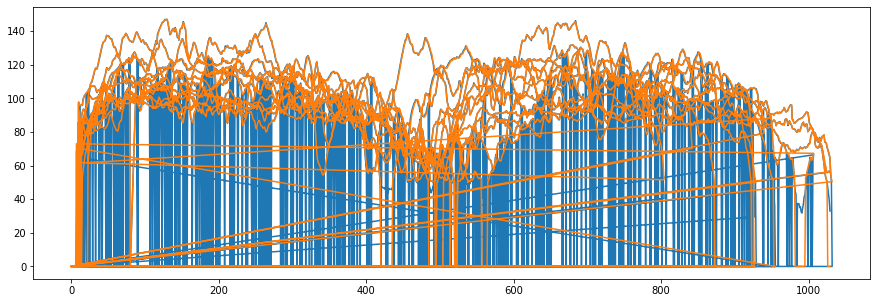

In [50]:

plt.figure(figsize=(15,5)) 
plt.plot(df['Timestamp'],df['Speed'])
plt.plot(df['Timestamp'],df['GPS'])
plt.show()

In [ ]:

plt.figure(figsize=(15,5)) 
plt.plot(df['Timestamp'],df['GPS'])
plt.show()

Eliminating Rows with no significance

In [ ]:
df.info()

In [51]:
df=df[(df['X_pos']!=-9.0)|(df['Phi_angle']!=-9.0)|(df['Road_width']!=-9.0)]

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12005 entries, 12 to 1025
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    12005 non-null  int64  
 1   A_x          12005 non-null  float64
 2   A_y          12005 non-null  float64
 3   A_z          12005 non-null  float64
 4   Speed        12005 non-null  float64
 5   Lane_Change  12005 non-null  float64
 6   No_Of_Veh    12005 non-null  float64
 7   Dist_Veh     12005 non-null  float64
 8   GPS          12005 non-null  float64
 9   X_pos        12005 non-null  float64
 10  Phi_angle    12005 non-null  float64
 11  Road_width   12005 non-null  float64
 12  Target       12005 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 1.3 MB


Add Vehicle Flag

In [52]:
df.loc[df['Dist_Veh']!=999,'Vehicle_Flag']=1
df['Vehicle_Flag']=df['Vehicle_Flag'].fillna(0)
df['Vehicle_Flag'].value_counts()

1.0    7262
0.0    4743
Name: Vehicle_Flag, dtype: int64

In [87]:
df[df['Dist_Veh']!=999].count()

Timestamp       7262
A_x             7262
A_y             7262
A_z             7262
Speed           7262
Lane_Change     7262
No_Of_Veh       7262
Dist_Veh        7262
GPS             7262
X_pos           7262
Phi_angle       7262
Road_width      7262
Target          7262
Vehicle_Flag    7262
dtype: int64

In [88]:
df.head()

,Timestamp,A_x,A_y,A_z,Speed,Lane_Change,No_Of_Veh,Dist_Veh,GPS,X_pos,Phi_angle,Road_width,Target,Vehicle_Flag
12,12,-0.0161,-0.0209,-0.08330,78.8,0.0,0.0,999.0,77.800000,0.000,-0.000,3.500,2,0.0
13,13,-0.0138,-0.0032,-0.32046,82.7,0.0,0.0,999.0,79.287500,0.000,-0.000,3.500,2,0.0
14,14,-0.0044,-0.0149,-1.05350,85.5,0.0,0.0,999.0,83.050000,0.300,0.047,3.500,2,0.0
15,15,-0.0015,-0.0042,-0.59388,85.7,0.0,0.0,999.0,85.540000,0.178,-0.008,3.084,2,0.0
16,16,0.0147,-0.0144,-0.19306,85.5,0.0,0.0,999.0,85.655556,-0.191,0.015,3.280,2,0.0


In [89]:
df.describe()

,Timestamp,A_x,A_y,A_z,Speed,Lane_Change,No_Of_Veh,Dist_Veh,GPS,X_pos,Phi_angle,Road_width,Target,Vehicle_Flag
count,12005.000000,12005.000000,12005.000000,12005.000000,12005.000000,12005.000000,12005.000000,12005.000000,12005.000000,12005.000000,12005.000000,12005.000000,12005.000000,12005.000000
mean,478.544107,-0.012254,-0.007511,-0.046579,96.146626,0.004082,1.593336,416.306963,99.041184,0.108126,0.054982,3.202603,0.837818,0.604915
std,272.693156,0.014253,0.057793,0.277471,24.178140,0.176700,1.141762,471.393554,17.362036,0.381505,0.061898,0.431586,0.949633,0.488889
min,6.000000,-0.123800,-0.536400,-3.404520,0.000000,-2.000000,0.000000,1.220000,0.000000,-1.071000,-0.277000,1.834000,0.000000,0.000000
25%,243.000000,-0.017667,-0.011600,-0.128380,88.100000,0.000000,1.000000,24.400000,89.300000,-0.130000,0.012000,2.988000,0.000000,0.000000
50%,475.000000,-0.010800,-0.000300,-0.020580,98.700000,0.000000,1.000000,53.740000,99.266667,0.030000,0.051000,3.181000,1.000000,1.000000
75%,709.000000,-0.004600,0.010700,0.077420,110.900000,0.000000,2.000000,999.000000,111.200000,0.293000,0.092000,3.360000,2.000000,1.000000
max,1031.000000,0.084000,0.312200,1.251460,147.100000,2.000000,7.000000,999.000000,147.066667,2.758000,0.517000,8.120000,4.000000,1.000000


In [64]:
df.drop(df[df['GPS'] == 0].index, inplace = True)

In [65]:
df[df['GPS'] == 0]

,Timestamp,A_x,A_y,A_z,Speed,Lane_Change,No_Of_Veh,Dist_Veh,GPS,X_pos,Phi_angle,Road_width,Target,Vehicle_Flag


In [90]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


In [91]:
df = shuffle(df)
df_train, df_test = train_test_split(df, test_size=0.2)

In [92]:
df_train.to_csv("Choice_Data_Train.csv",index=False)
df_test.to_csv("Choice_Data_Test.csv",index=False)

In [8]:
dop=pd.read_csv("C:/DDS/Semester2/AnalyticsProject/ppt1/AnalyticsProject/output/Base/BaseModel_estimates.csv")

In [9]:
dop

,Name,Val,STD,T-ratio,Rob.std.err.,Rob.t-ratio(0)
0,asc_acc,6.781338,0.943571,7.186885,1.630117,4.160033
1,asc_brk,8.956248,0.853138,10.498005,2.387834,3.750783
2,speed_acc,-1.709943,0.206158,-8.294344,0.355757,-4.806499
3,speed_brk,-2.101052,0.186626,-11.258058,0.520002,-4.040468
4,nodv_acc,0.136922,0.028158,4.862699,0.036661,3.734807
5,nodv_brk,0.014091,0.027093,0.520103,0.039607,0.355782
6,dist_acc,0.007894,0.006240,1.264928,0.005720,1.380004
7,dist_brk,0.029977,0.005649,5.306216,0.010117,2.962854
8,time_acc,-0.249710,0.169268,-1.475236,0.137839,-1.811608
9,time_brk,-0.830999,0.158710,-5.235948,0.289094,-2.874496


In [56]:
dop['Val'][2]

-1.70994327

In [66]:
V_acc= (df['Dist_Veh']/(df['GPS']*0.28)) * df['Vehicle_Flag']*dop['Val'][8] +  df['Vehicle_Flag']*df['Dist_Veh']*dop['Val'][6] \
+ np.log(df['GPS'])*dop['Val'][2] + df['No_Of_Veh']*dop['Val'][4] + df['X_pos']*dop['Val'][20] + dop['Val'][0]

D1-Motor_norm0-1

In [69]:
D1_NORMAL_MOTORWAY_merged.drop(D1_NORMAL_MOTORWAY_merged[D1_NORMAL_MOTORWAY_merged['GPS'] == 0].index, inplace = True)

In [70]:
D1_NORMAL_MOTORWAY_merged.loc[D1_NORMAL_MOTORWAY_merged['Dist_Veh']!=999,'Vehicle_Flag']=1
D1_NORMAL_MOTORWAY_merged['Vehicle_Flag']=D1_NORMAL_MOTORWAY_merged['Vehicle_Flag'].fillna(0)
D1_NORMAL_MOTORWAY_merged['Vehicle_Flag'].value_counts()

1.0    522
0.0    354
Name: Vehicle_Flag, dtype: int64

In [71]:
V_acc_11= (D1_NORMAL_MOTORWAY_merged['Dist_Veh']/(D1_NORMAL_MOTORWAY_merged['GPS']*0.28)) * D1_NORMAL_MOTORWAY_merged['Vehicle_Flag']*dop['Val'][8] +  D1_NORMAL_MOTORWAY_merged['Vehicle_Flag']*D1_NORMAL_MOTORWAY_merged['Dist_Veh']*dop['Val'][6] \
+ np.log(D1_NORMAL_MOTORWAY_merged['GPS'])*dop['Val'][2] + D1_NORMAL_MOTORWAY_merged['No_Of_Veh']*dop['Val'][4] + D1_NORMAL_MOTORWAY_merged['X_pos']*dop['Val'][20] + dop['Val'][0]

D4-Motor_aggressive

In [74]:
D4_AGGRESSIVE_MOTORWAY_merged.drop(D4_AGGRESSIVE_MOTORWAY_merged[D4_AGGRESSIVE_MOTORWAY_merged['GPS'] == 0].index, inplace = True)

In [75]:
D4_AGGRESSIVE_MOTORWAY_merged.loc[D4_AGGRESSIVE_MOTORWAY_merged['Dist_Veh']!=999,'Vehicle_Flag']=1
D4_AGGRESSIVE_MOTORWAY_merged['Vehicle_Flag']=D4_AGGRESSIVE_MOTORWAY_merged['Vehicle_Flag'].fillna(0)
D4_AGGRESSIVE_MOTORWAY_merged['Vehicle_Flag'].value_counts()

1.0    769
0.0    165
Name: Vehicle_Flag, dtype: int64

In [76]:
V_acc_42= (D4_AGGRESSIVE_MOTORWAY_merged['Dist_Veh']/(D4_AGGRESSIVE_MOTORWAY_merged['GPS']*0.28)) * D4_AGGRESSIVE_MOTORWAY_merged['Vehicle_Flag']*dop['Val'][8] +  D4_AGGRESSIVE_MOTORWAY_merged['Vehicle_Flag']*D4_AGGRESSIVE_MOTORWAY_merged['Dist_Veh']*dop['Val'][6] \
+ np.log(D4_AGGRESSIVE_MOTORWAY_merged['GPS'])*dop['Val'][2] + D4_AGGRESSIVE_MOTORWAY_merged['No_Of_Veh']*dop['Val'][4] + D4_AGGRESSIVE_MOTORWAY_merged['X_pos']*dop['Val'][20] + dop['Val'][0]

In [59]:
V_acc


12     -0.663997
13     -0.696381
14     -0.821379
15     -0.853300
16     -0.799372
          ...   
1021   -0.506548
1022   -0.456888
1023   -0.429392
1024   -0.435567
1025   -0.451481
Length: 12005, dtype: float64

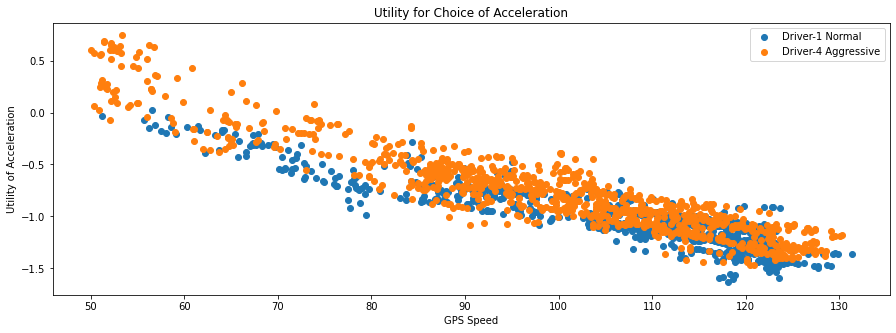

In [84]:
plt.figure(figsize=(15,5)) 
plt.scatter(D1_NORMAL_MOTORWAY_merged['GPS'],V_acc_11)
plt.scatter(D4_AGGRESSIVE_MOTORWAY_merged['GPS'],V_acc_42)

plt.xlabel("GPS Speed")
plt.ylabel("Utility of Acceleration")
plt.title("Utility for Choice of Acceleration")

plt.legend(["Driver-1 Normal", "Driver-4 Aggressive"])

plt.show()